In [1]:
import datetime
import string
import random

import pandas as pd
import sqlite3

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
def load_dataframe():
    con = sqlite3.connect("../data/global_urban_building_completeness.gpkg")
    query = f"""
        select
            a.urban_center_id 
            --,b.gini 
            --,b.moran 
            --,b.spatial_proximity
            ,b."cluster" as cluster_label
            ,100*a.prediction_osm_completeness_2023 as "2023"
            ,100*a.prediction_osm_completeness_2022 as "2022"
            ,100*a.prediction_osm_completeness_2021 as "2021"
            ,100*a.prediction_osm_completeness_2020 as "2020"
            ,100*a.prediction_osm_completeness_2019 as "2019"
            ,100*a.prediction_osm_completeness_2018 as "2018"             
            ,100*a.prediction_osm_completeness_2017 as "2017"
            ,100*a.prediction_osm_completeness_2016 as "2016"
            ,100*a.prediction_osm_completeness_2015 as "2015"
            ,100*a.prediction_osm_completeness_2014 as "2014"
            ,100*a.prediction_osm_completeness_2013 as "2013"
            ,100*a.prediction_osm_completeness_2012 as "2012"
            ,100*a.prediction_osm_completeness_2011 as "2011"
            ,100*a.prediction_osm_completeness_2010 as "2010"
            ,100*a.prediction_osm_completeness_2009 as "2009"
            ,100*a.prediction_osm_completeness_2008 as "2008"
        from rf_adjusted_prediction_reference_and_osm_urban_centers a
        left join inequality_measures_urban_centers b on
            a.urban_center_id = b.urban_center_id 
        order by a.urban_center_id
    """
    df = pd.read_sql_query(query, con=con)
    return df

In [3]:
df = load_dataframe()

In [4]:
display(df)

,urban_center_id,cluster_label,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
0,1,b,57.906881,57.354945,51.962073,46.064173,45.055973,42.887316,33.255785,28.339852,26.292429,18.794313,19.084657,13.633336,4.326969,0.196741,0.000000,0.0
1,2,e,237.913840,237.741607,237.684750,237.457625,57.410645,53.682503,41.996261,39.707877,27.704995,19.489383,5.224955,3.784696,0.173738,0.173738,0.000000,0.0
2,3,a,37.016836,34.265045,33.523403,32.875573,30.903999,30.777345,30.786086,28.399002,28.431900,24.643160,10.138919,0.349680,0.002921,0.000000,0.000000,0.0
3,4,e,94.095757,94.094294,94.066512,93.118371,91.938849,20.750911,16.522304,16.000968,15.200898,14.441044,10.807412,2.960179,2.540750,2.045553,0.501294,0.0
4,5,e,102.158978,105.318778,105.415047,104.828071,105.381847,19.506551,15.418248,13.155162,12.692965,12.114385,4.184171,3.934400,0.561047,0.039992,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13184,13185,b,50.410021,42.941782,37.547454,33.366264,29.610781,26.796732,26.406144,26.623568,4.967626,4.668484,1.245960,1.226539,0.000000,0.000000,0.000000,0.0
13185,13186,None,38.056225,37.314362,36.815397,36.815397,25.117025,25.117025,25.117025,25.117025,25.117025,25.117025,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
13186,13187,None,99.877398,99.391398,95.799753,94.844191,52.908872,48.812774,46.899523,41.997530,38.948361,0.234610,0.234610,0.234610,0.234610,0.000000,0.000000,0.0
13187,13188,e,90.439243,90.419013,90.162574,90.176813,87.529559,69.777498,63.210550,56.266111,55.461734,54.009746,34.804451,12.698160,3.900783,1.778971,0.000000,0.0


In [5]:
df = df.melt(
    id_vars=["cluster_label", "urban_center_id"], 
    var_name="year", 
    value_name="prediction_osm_completeness"
)

df["year"] = df["year"].apply(pd.to_datetime)
display(df)

,cluster_label,urban_center_id,year,prediction_osm_completeness
0,b,1,2023-01-01,57.906881
1,e,2,2023-01-01,237.913840
2,a,3,2023-01-01,37.016836
3,e,4,2023-01-01,94.095757
4,e,5,2023-01-01,102.158978
...,...,...,...,...
211019,b,13185,2008-01-01,0.000000
211020,None,13186,2008-01-01,0.000000
211021,None,13187,2008-01-01,0.000000
211022,e,13188,2008-01-01,0.000000


/tmp/ipykernel_48495/2895984109.py:52: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(gs1[i])


c
d
a
b
e


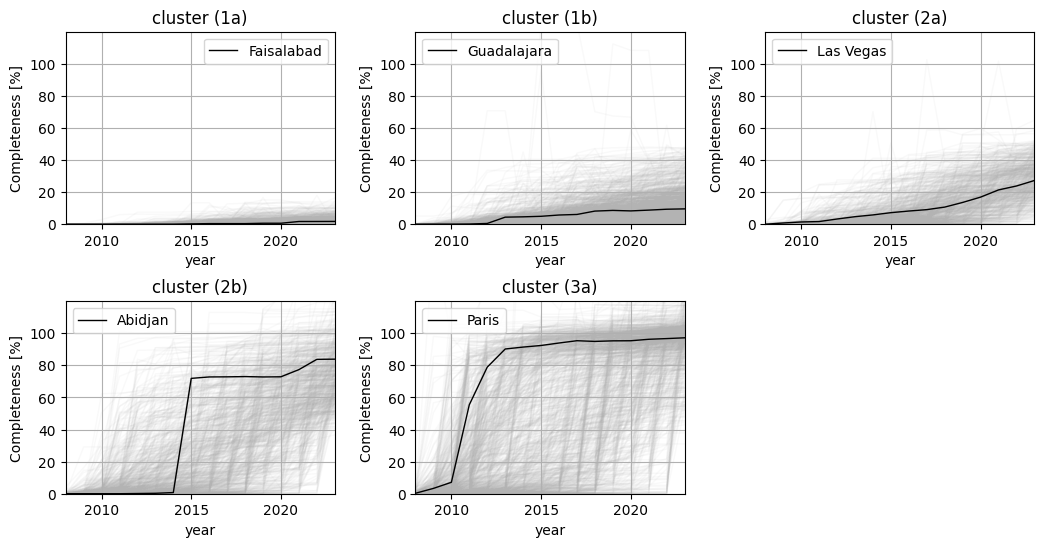

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(12.5, 6))
gs1 = gridspec.GridSpec(2, 3)
gs1.update(wspace=0.3, hspace=0.4) # set the spacing between axes.

all_months = [
    datetime.date(2008, 1, 1),
    datetime.date(2009, 1, 1),
    datetime.date(2010, 1, 1),
    datetime.date(2011, 1, 1),
    datetime.date(2012, 1, 1),
    datetime.date(2013, 1, 1),
    datetime.date(2014, 1, 1),
    datetime.date(2015, 1, 1),
    datetime.date(2016, 1, 1),
    datetime.date(2017, 1, 1),
    datetime.date(2018, 1, 1),
    datetime.date(2019, 1, 1),
    datetime.date(2020, 1, 1),
    datetime.date(2021, 1, 1),
    datetime.date(2022, 1, 1),
    datetime.date(2023, 1, 1),
]

urban_center_ids_selection = [
    6445,  # Faisalabad
    88,  # Guadalajara
    74,  # Las Vegas
    2859,  # Abidjan
    2054  # Paris
] 

df.dropna(inplace=True)

cluster_labels = [
    "c", "d", "a", "b", "e"
]

title_labels = [
    "cluster (1a)", "cluster (1b)", "cluster (2a)", "cluster (2b)", "cluster (3a)"
]

point_labels_names = [
    "Faisalabad",
    "Guadalajara",
    "Las Vegas",
    "Abidjan",
    "Paris",
]

for i, cluster_label in enumerate(cluster_labels):
    
    ax = plt.subplot(gs1[i])
    print(cluster_label)
    
    region_df = df.loc[df["cluster_label"] == str(cluster_label)]
    region_df.reset_index(inplace=True)
    
    urban_center_ids = region_df["urban_center_id"].to_list()
            
    sns.lineplot(
        data=region_df,
        x="year",
        y="prediction_osm_completeness",
        units="urban_center_id",
        alpha=0.075,
        estimator=None,
        color=".7",
        linewidth=1,
        ax=ax,
        legend=False,
    )
    
    sample_urban_centers = random.sample(urban_center_ids, 10)
        
    example_df = region_df.loc[region_df["urban_center_id"].isin(urban_center_ids_selection)]
    example_df.reset_index(inplace=True)
    
    sns.lineplot(
        data=example_df,
        x="year",
        y="prediction_osm_completeness",
        legend=True,
        label=point_labels_names[i],
        linewidth=1.0,
        color="black"
    )
    
    ax.set_ylim([0, 120])
    ax.set_xlim([datetime.date(2008, 1, 1), datetime.date(2023, 1, 1)])
    ax.set_xticks([
        datetime.date(2010, 1, 1),
        datetime.date(2015, 1, 1),
        datetime.date(2020, 1, 1),
    ])
    ax.set_xticklabels(["2010", "2015", "2020"])
    ax.set_yticks([
        0, 20, 40, 60, 80, 100
    ])
    ax.set_ylabel("Completeness [%]")
    ax.set_title(title_labels[i])
    ax.grid()

plt.savefig(
    "../figures/temporal_evolution_urban_completeness_clustering_plot.png",
    dpi=300,
    bbox_inches = 'tight',
    pad_inches = 0.75
)
plt.show()